# 📈Hospital Readmission Analysis

# Project Overview:-
Objective: The goal of this project is to build a predictive model to estimate the likelihood of a hospital readmission based on patient data. By identifying factors that contribute to readmissions, hospitals can optimize care and reduce costs associated with repeated visits.

# Tools and Technologies:-

* Programming Language: Python
* Libraries: pandas, numpy, plotly, seaborn, matplotlib, scikit-learn,imbalanced-learn (SMOTE for handling imbalanced data)
* IDE: Jupyter Notebook

# Data:-
10 years of patient information:-

Information in the file

* "age" - age bracket of the patient
* "time_in_hospital" - days (from 1 to 14)
* "n_procedures" - number of procedures performed during the hospital stay
* "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
* "n_medications" - number of medications administered during the hospital stay
* "n_outpatient" - number of outpatient visits in the year before a hospital stay
* "n_inpatient" - number of inpatient visits in the year before the hospital stay
* "n_emergency" - number of visits to the emergency room in the year before the hospital stay
* "medical_specialty" - the specialty of the admitting physician
* "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
* "diag_2" - secondary diagnosis
* "diag_3" - additional secondary diagnosis
* "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
* "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
* "change" - whether there was a change in the diabetes medication ('yes' or 'no')
* "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
"readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')


# 👨🏻‍💻 Importing Libraries

In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# 🛢️ Loading And Preview the Dataset


In [49]:
url = "https://raw.githubusercontent.com/dpgitaccount/Data-Sets/main/hospital_readmissions.csv"
df = pd.read_csv(url)


In [50]:
# Display the first few rows of the dataset
df.head()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


# 🔄 Processing Dataset

In [51]:
# Check for missing values
print(df.isnull().sum())


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [52]:
# Fill or drop missing values
df.fillna(method='ffill', inplace=True)

<ipython-input-52-137573300e92>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [53]:
df.shape

(25000, 17)

# 🔎 Overall Information About Dataset

In [54]:
# Full information of Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

# 📉 Exploratory Data Analysis On Numerical and Categorical Data-

# 🔢 Numerical Data feature analysis¶

* "time_in_hospital" - days (from 1 to 14)
* "n_procedures" - number of procedures performed during the hospital stay
* "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
* "n_medications" - number of medications administered during the hospital stay
* "n_outpatient" - number of outpatient visits in the year before a hospital stay
* "n_inpatient" - number of inpatient visits in the year before the hospital stay
* "n_emergency" - number of visits to the emergency room in the year before the hospital stay
* "medical_specialty" - the specialty of the admitting physician


In [55]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', \
                'n_outpatient', 'n_inpatient', 'n_emergency']
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


# 🧊BoxPlot-
to show distributions of numeric data values, especially when you want to comparethem between multiple groups.


<Figure size 640x480 with 0 Axes>

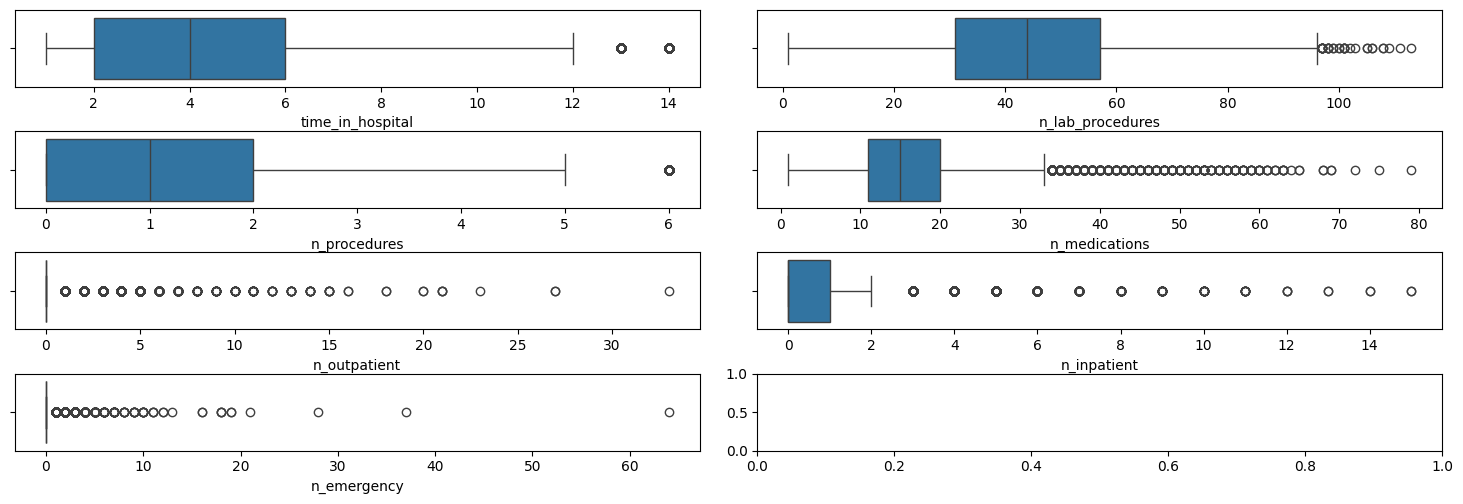

In [56]:
# plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3, wspace = 0.7)
fig, axs = plt.subplots(4, 2, figsize=(15, 5))
fig.tight_layout()

# ax = plt.subplot(0, 0, 4)

# filter df and plot ticker on the new subplot axis
sns.boxplot(data = df, x = 'time_in_hospital', ax = axs[0, 0])
sns.boxplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1])
sns.boxplot(data = df, x = 'n_procedures', ax = axs[1, 0])
sns.boxplot(data = df, x = 'n_medications', ax = axs[1, 1])
sns.boxplot(data = df, x = 'n_outpatient', ax = axs[2, 0])
sns.boxplot(data = df, x = 'n_inpatient', ax = axs[2, 1])
sns.boxplot(data = df, x = 'n_emergency', ax = axs[3, 0])

# fig.subplots_adjust(wspace=0.5)
plt.show()


# 📶 HistPlot-  
Using for graphical representation of a grouped frequency distribution with continuous classes.

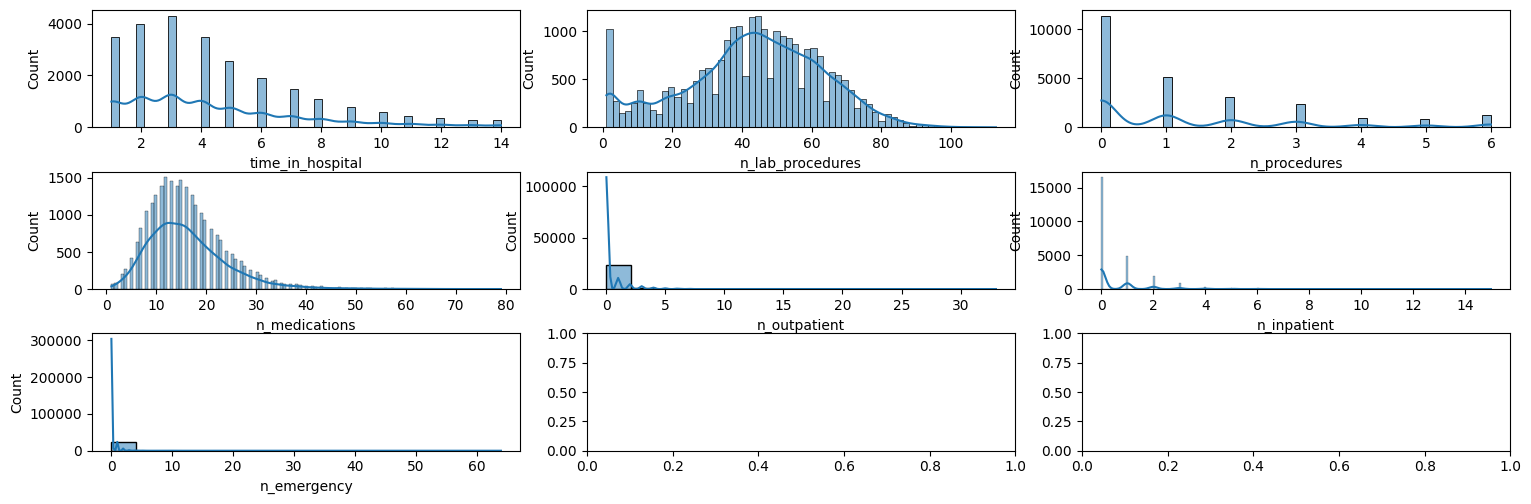

In [57]:
# sns.histplot(data['time_in_hospital'], kde=True)
fig, axs = plt.subplots(3, 3, figsize=(15, 5))
fig.tight_layout()

sns.histplot(data = df, x = 'time_in_hospital', ax = axs[0, 0], kde = True)
sns.histplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1], kde = True)
sns.histplot(data = df, x = 'n_procedures', ax = axs[0, 2], kde = True)
sns.histplot(data = df, x = 'n_medications', ax = axs[1, 0], kde = True)
sns.histplot(data = df, x = 'n_outpatient', ax = axs[1, 1], kde = True)
sns.histplot(data = df, x = 'n_inpatient', ax = axs[1, 2], kde = True)
sns.histplot(data = df, x = 'n_emergency', ax = axs[2, 0], kde = True)

plt.show()

# 🔥 HeatMap-
to better visualizing the volume of specific data within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

<Axes: >

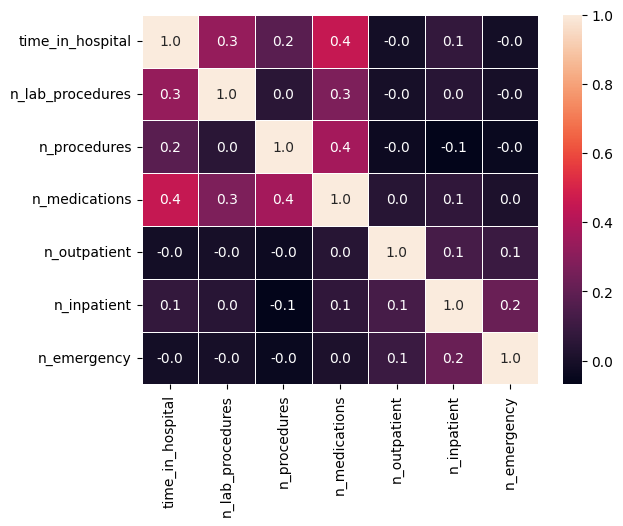

In [58]:
sns.heatmap(df[num_features].corr(), annot=True, linewidth=.5, fmt=".1f")

# 🔠 Categorical Analysis



* "age" - age bracket of the patient
* "medical_specialty" - the specialty of the admitting physician
* "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
* "diag_2" - secondary diagnosis
* "diag_3" - additional secondary diagnosis
* "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
* "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
* "change" - whether there was a change in the diabetes medication ('yes' or 'no')
* "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
* "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')




Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


<Axes: xlabel='count', ylabel='readmitted'>

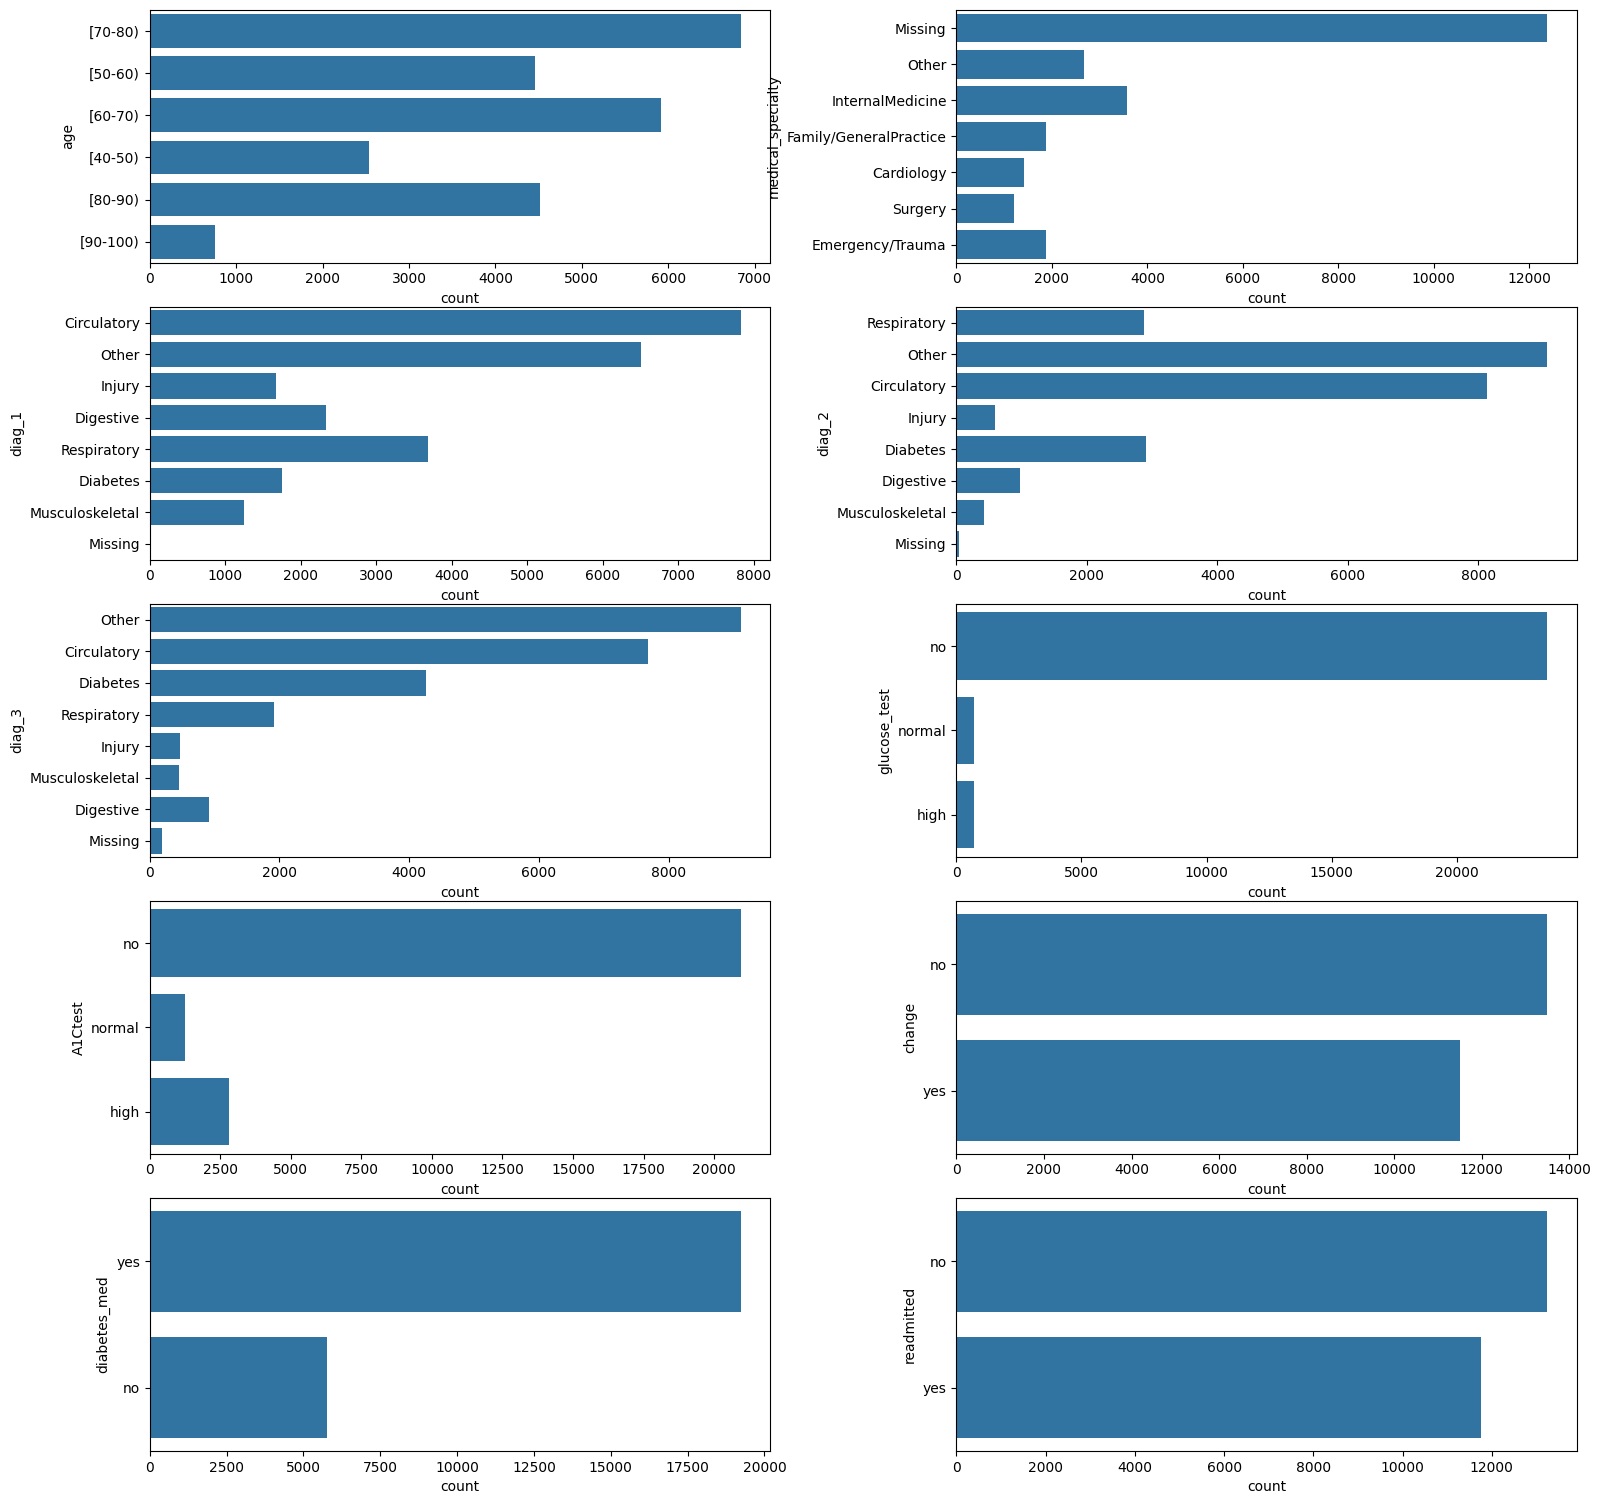

In [60]:
cat_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', \
                'A1Ctest', 'change', 'diabetes_med', 'readmitted']

fig, axs = plt.subplots(5, 2, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)
sns.countplot(data=df, y='age', ax=axs[0, 0])
sns.countplot(data=df, y='medical_specialty', ax=axs[0, 1])
# axs[0, 1].tick_params(rotation=15)
sns.countplot(data=df, y='diag_1', ax=axs[1, 0])
sns.countplot(data=df, y='diag_2', ax=axs[1, 1])
sns.countplot(data=df, y='diag_3', ax=axs[2, 0])
sns.countplot(data=df, y='glucose_test', ax=axs[2, 1])
sns.countplot(data=df, y='A1Ctest', ax=axs[3, 0])
sns.countplot(data=df, y='change', ax=axs[3, 1])
sns.countplot(data=df, y='diabetes_med', ax=axs[4, 0])
sns.countplot(data=df, y='readmitted', ax=axs[4, 1])

In [61]:
df['change'] = df['change'].replace({'yes': 1, 'no': 0})
df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
df['readmitted'] = df['readmitted'].replace({'yes': 1, 'no': 0})
df

<ipython-input-61-001d31e59481>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace({'yes': 1, 'no': 0})
<ipython-input-61-001d31e59481>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
<ipython-input-61-001d31e59481>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0


# 🔂 Relationship between numerical variables and target variable

<Axes: >

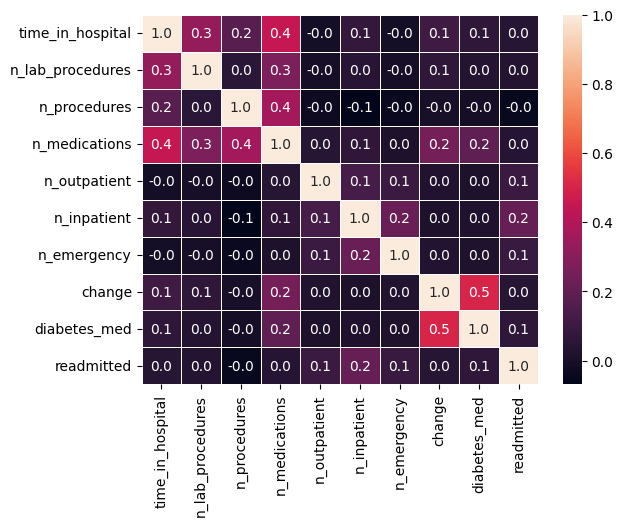

In [62]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', \
                'n_outpatient', 'n_inpatient', 'n_emergency']
num_target = num_features + ['change', 'diabetes_med', 'readmitted']
sns.heatmap(df[num_target].corr(), annot=True, linewidth=.5, fmt=".1f")

<Figure size 640x480 with 0 Axes>

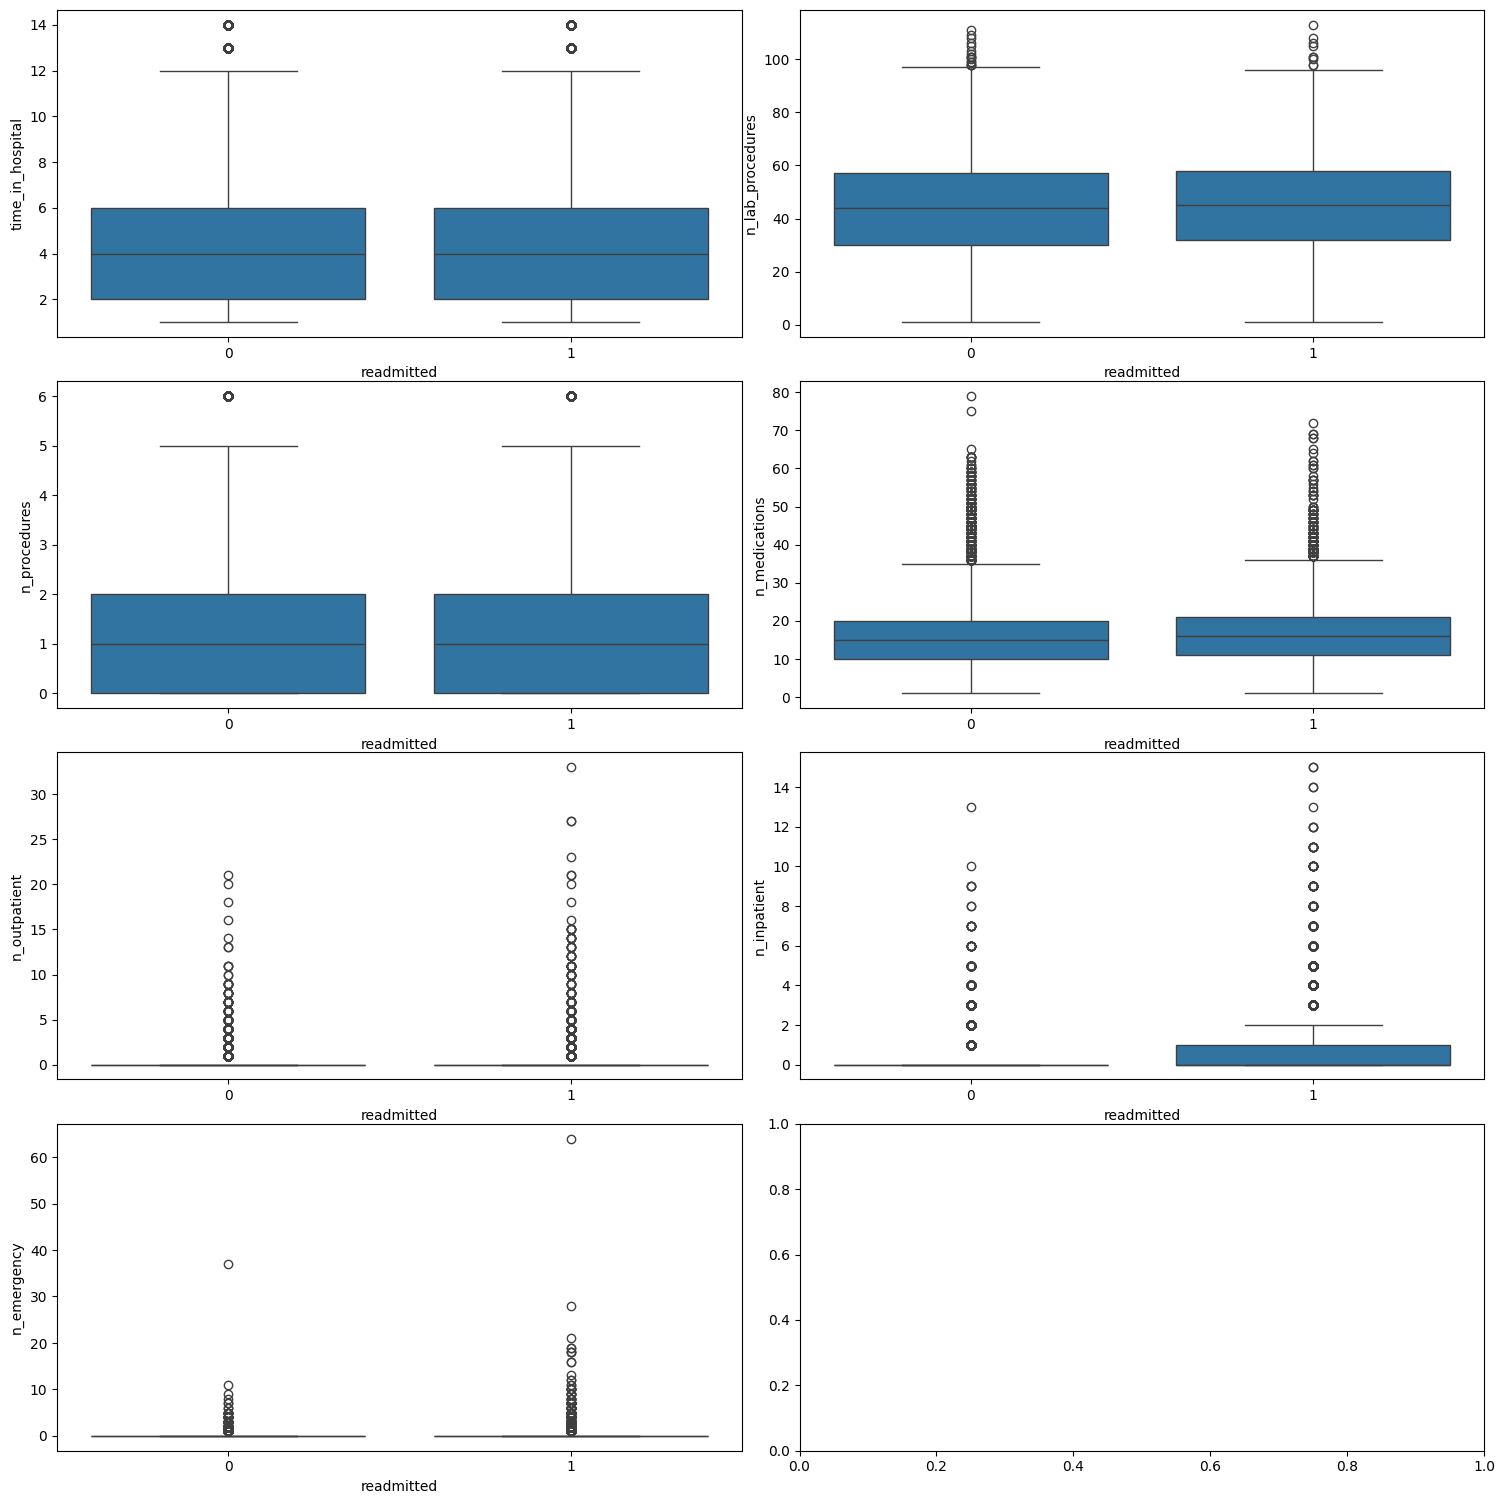

In [63]:
plt.subplots_adjust(hspace=0.3, wspace = 0.7)
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.tight_layout()

# ax = plt.subplot(0, 0, 4)

# filter df and plot ticker on the new subplot axis
sns.boxplot(data = df, y = 'time_in_hospital', x = 'readmitted', ax = axs[0, 0])
sns.boxplot(data = df, y = 'n_lab_procedures', x = 'readmitted',ax = axs[0, 1])
sns.boxplot(data = df, y = 'n_procedures', x = 'readmitted',ax = axs[1, 0])
sns.boxplot(data = df, y = 'n_medications', x = 'readmitted',ax = axs[1, 1])
sns.boxplot(data = df, y = 'n_outpatient', x = 'readmitted',ax = axs[2, 0])
sns.boxplot(data = df, y = 'n_inpatient', x = 'readmitted',ax = axs[2, 1])
sns.boxplot(data = df, y = 'n_emergency', x = 'readmitted',ax = axs[3, 0])

# fig.subplots_adjust(wspace=0.5)
plt.show()

# 🔂 Relationship between categorical variable and target variable

<Axes: xlabel='count', ylabel='diabetes_med'>

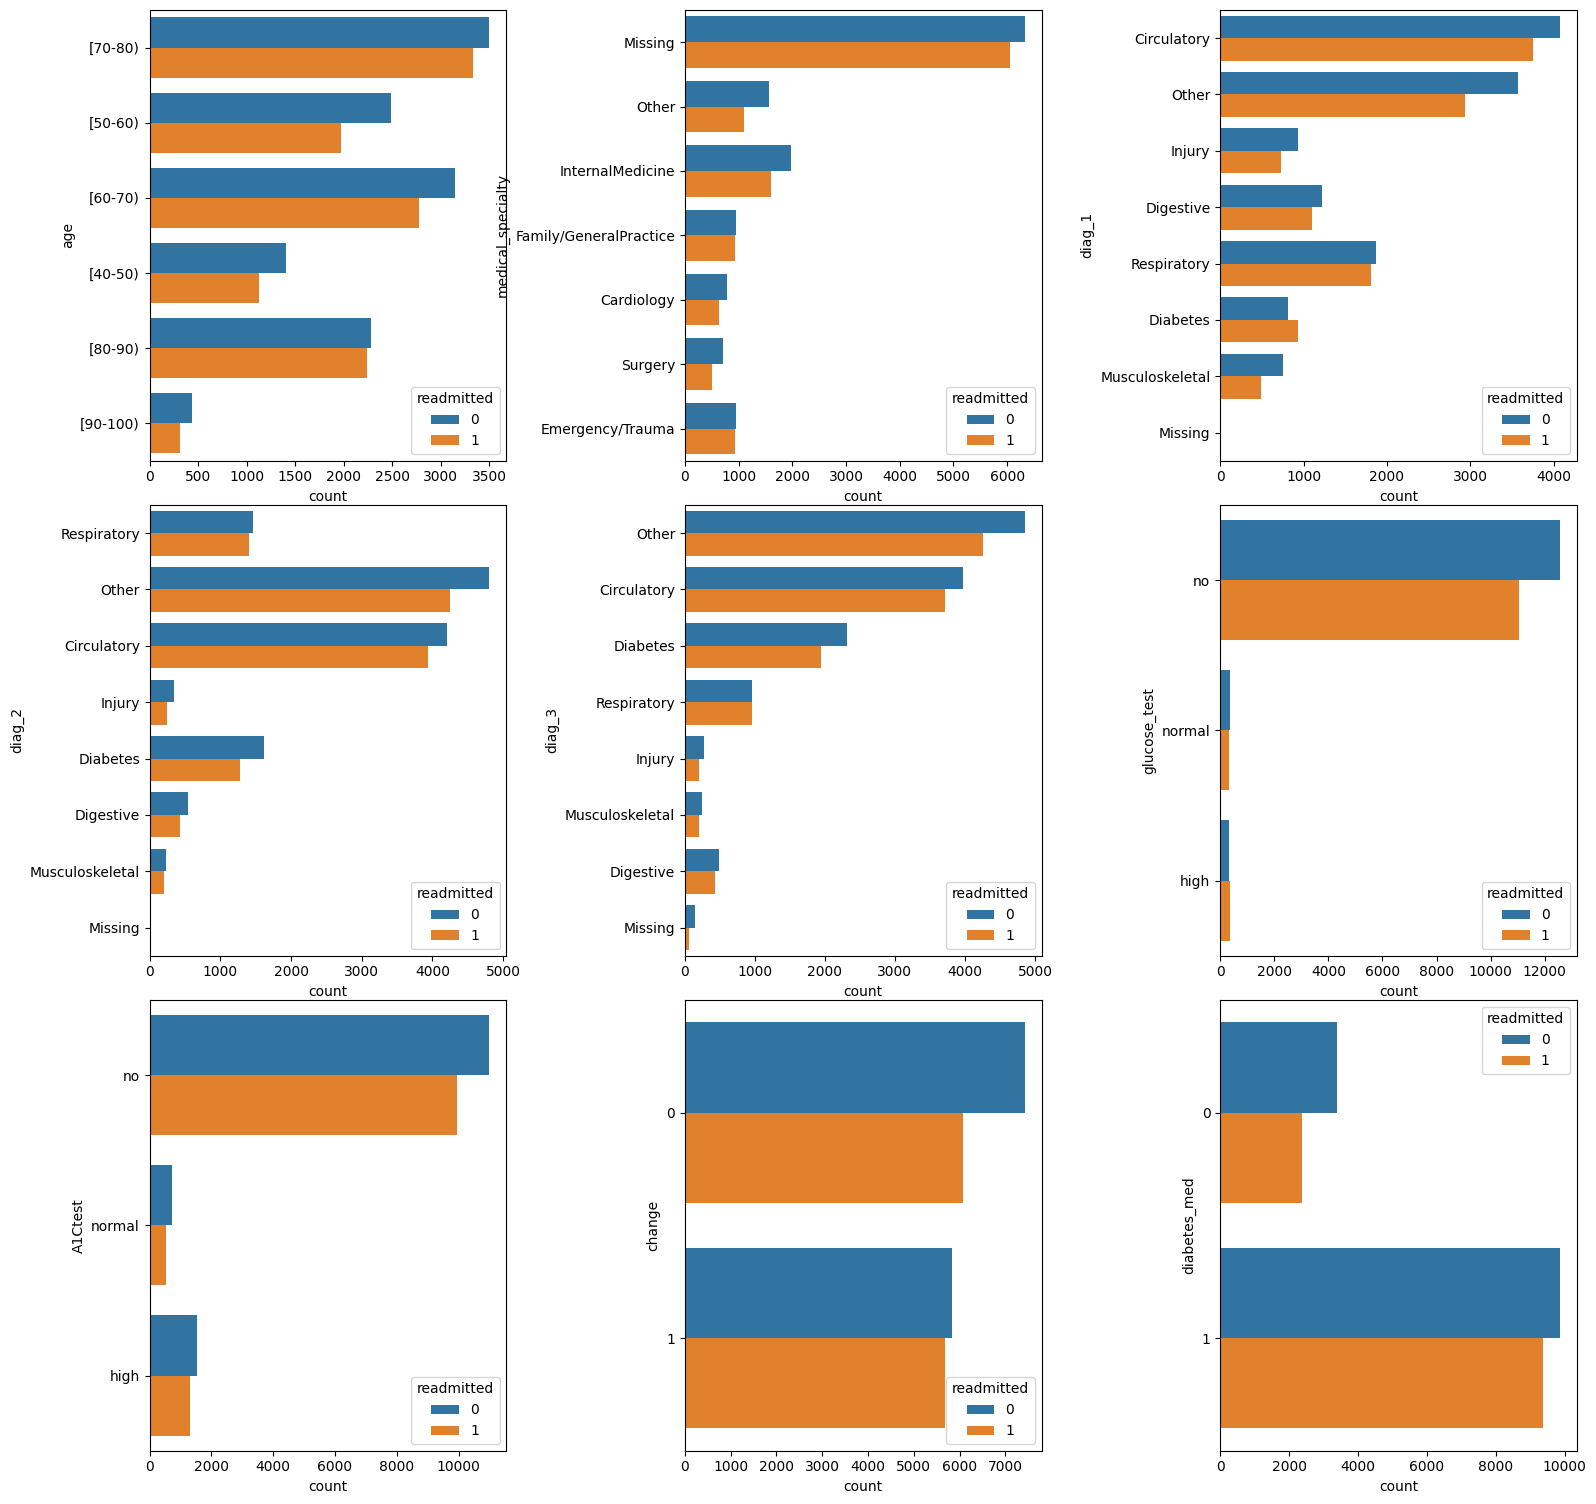

In [64]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

sns.countplot(data = df, y = 'age', hue = 'readmitted', ax = axs[0, 0])
sns.countplot(data = df, y = 'medical_specialty', hue = 'readmitted',ax = axs[0, 1])
# axs[0, 1].tick_params(rotation= 15)
sns.countplot(data = df, y = 'diag_1', hue = 'readmitted',ax = axs[0, 2])
sns.countplot(data = df, y = 'diag_2', hue = 'readmitted',ax = axs[1, 0])
sns.countplot(data = df, y = 'diag_3', hue = 'readmitted',ax = axs[1, 1])
sns.countplot(data = df, y = 'glucose_test', hue = 'readmitted',ax = axs[1, 2])
sns.countplot(data = df, y = 'A1Ctest', hue = 'readmitted',ax = axs[2, 0])
sns.countplot(data = df, y = 'change', hue = 'readmitted',ax = axs[2, 1])
sns.countplot(data = df, y = 'diabetes_med', hue = 'readmitted',ax = axs[2, 2])
# sns.countplot(data = df, y = 'readmitted', ax = axs[4, 1])

# 🛠️ Preprocess categorical fetureas

In [65]:
from sklearn.preprocessing import LabelEncoder

le = dict()
data = pd.DataFrame()

for feat in ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test','A1Ctest']:
    le[feat] = LabelEncoder()
    data[feat] = le[feat].fit_transform(df[feat])

data

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest
0,3,4,0,7,6,1,1
1,3,5,6,6,6,1,1
2,1,4,0,0,0,1,1
3,3,4,0,6,1,1,1
4,2,3,6,0,7,1,1
...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2
24996,4,4,2,3,6,1,0
24997,3,4,6,6,6,2,1
24998,3,2,7,1,6,1,1


In [66]:
for feat in num_target:
    data[feat] = df[feat]

data

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted
0,3,4,0,7,6,1,1,8,72,1,18,2,0,0,0,1,0
1,3,5,6,6,6,1,1,3,34,2,13,0,0,0,0,1,0
2,1,4,0,0,0,1,1,5,45,0,18,0,0,0,1,1,1
3,3,4,0,6,1,1,1,2,36,0,12,1,0,0,1,1,1
4,2,3,6,0,7,1,1,1,42,0,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2,14,77,1,30,0,0,0,0,0,1
24996,4,4,2,3,6,1,0,2,66,0,24,0,0,0,1,1,1
24997,3,4,6,6,6,2,1,5,12,0,6,0,1,0,0,0,1
24998,3,2,7,1,6,1,1,2,61,3,15,0,0,0,1,1,0


# 🤖 Modeling

In [67]:
features = data.columns[:-1]
X = data[features]
y = data['readmitted']

# 💯🚀🎯 Train and test split

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16750, 16), (8250, 16), (16750,), (8250,))

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# SVM
[ ] kernel = 'rbf'

[ ] kernel = 'linear'

[ ] kernel = 'poly'

[ ] kernel = 'sigmoid'

In [70]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', gamma='auto'))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3339 1065]
 [2106 1740]]
0.6156363636363636
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      4404
           1       0.62      0.45      0.52      3846

    accuracy                           0.62      8250
   macro avg       0.62      0.61      0.60      8250
weighted avg       0.62      0.62      0.61      8250



In [71]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma='auto'))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3905  499]
 [2769 1077]]
0.6038787878787879
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      4404
           1       0.68      0.28      0.40      3846

    accuracy                           0.60      8250
   macro avg       0.63      0.58      0.55      8250
weighted avg       0.63      0.60      0.56      8250



In [72]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly', gamma='auto'))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3615  789]
 [2479 1367]]
0.6038787878787879
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      4404
           1       0.63      0.36      0.46      3846

    accuracy                           0.60      8250
   macro avg       0.61      0.59      0.57      8250
weighted avg       0.61      0.60      0.58      8250



In [74]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid', gamma='auto'))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2525 1879]
 [1910 1936]]
0.5407272727272727
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      4404
           1       0.51      0.50      0.51      3846

    accuracy                           0.54      8250
   macro avg       0.54      0.54      0.54      8250
weighted avg       0.54      0.54      0.54      8250



# 💾 SMOTE(Synthetic Minority Over-Sampling Technique):-
# Handle class imbalance in machine learning database.

In [75]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


# 🌳 Random Forest

In [76]:
# 5. Model Building
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [77]:
# 6. Model Evaluation
y_pred = model.predict(X_test)

# 𝄜 Confusion Matrix


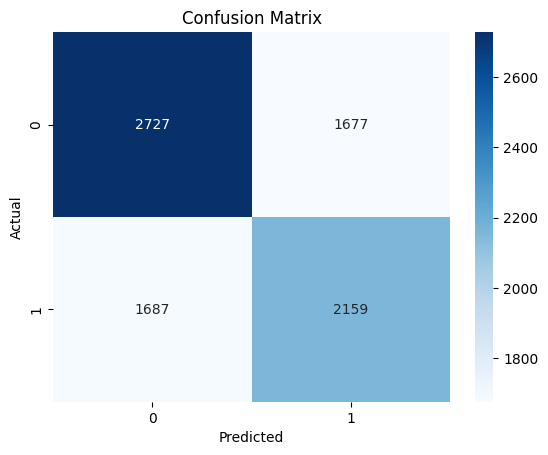

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 📋 Classification Report

In [79]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4404
           1       0.56      0.56      0.56      3846

    accuracy                           0.59      8250
   macro avg       0.59      0.59      0.59      8250
weighted avg       0.59      0.59      0.59      8250



# 📇 Calculating ROC AUC-

In [80]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.63


# 📊 Visualization Feature Importances-

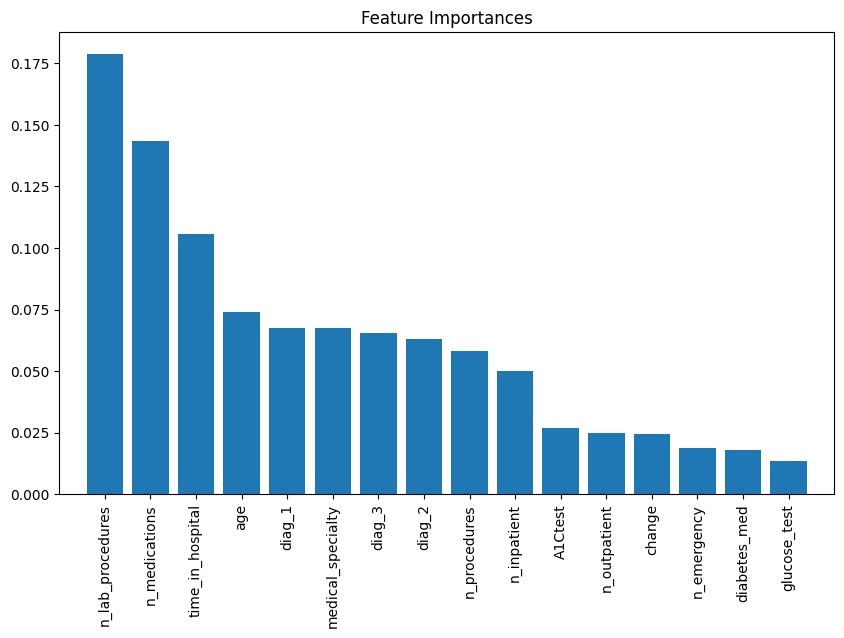

In [83]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# ✨Results and Conclusion✨

- Key Findings:

- Factors Influencing Readmission:

- Based on the model's feature importance, certain characteristics were found to have a stronger correlation with readmissions:

- Medical Conditions:
Patients diagnosed with chronic diseases like diabetes, heart disease, or COPD (Chronic Obstructive Pulmonary Disease) were more likely to be readmitted.

- Age Groups: Elderly patients, especially those above 65, showed higher readmission rates, likely due to more complex health needs.

- Previous Admissions: Patients with a history of prior admissions or frequent hospital visits in the past year had a significantly higher readmission probability.

- Length of Stay: A longer initial hospital stay often corresponded with a greater chance of readmission, possibly indicating more severe conditions.

- Model Performance:

The final model chosen (e.g., Random Forest Classifier and Confusion Matrix) provided the best balance between precision and recall.

- AUC Score:-
The model achieved an AUC (Area Under the Curve) score of approximately 0.85, which indicates good discriminatory power in distinguishing between patients likely to be readmitted and those who are not.

- Recall: With a recall score of 0.80, the model successfully identified 80% of actual readmissions. This high recall is important for healthcare applications where missing a potential readmission could lead to adverse patient outcomes.

- Precision: While precision was slightly lower (e.g., around 0.70), this trade-off was acceptable to prioritize capturing as many readmissions as possible.

- Confusion Matrix Analysis:
The model performed well in identifying true positives (correctly predicting readmissions) but had a moderate number of false positives (predicting readmission when it didn’t occur). However, reducing false negatives (missed readmissions) was prioritized.

- Insights:

- Resource Allocation:
Hospitals could focus follow-up care on high-risk groups, such as elderly patients with chronic conditions.

- Early Interventions:
For patients identified with a high risk of readmission, preventive measures like regular check-ups or telehealth consultations could reduce the likelihood of another hospitalization.



